# Collaborative Filtering
## Dataset

Adapted from http://www.dataperspective.info/2014/05/basic-recommendation-engine-using-r.html.

In [132]:
movies <-
  matrix(
    c(
      2.5, 3.5, 3, 3.5, 2.5, 3,
      3, 3.5, 1.5, 5, 3, 3.5,
      2.5, 3, NA, 3.5, NA, 4,
      NA, 3.5, 3, 4, 2.5, 4.5,
      3, 4, 2, 3, 2, 3,
      3, 4, NA, 5, 3.5, 3,
      NA, 4.5, NA, 4, 1, NA
    ),
    ncol = 6,
    byrow = T,
    dimnames = list(
      c("Michel", "Mathilde", "Yann", "Gaëlle", "Gregory", "Jean Christophe", "Benoit"),
      c("Titanic", "Batman", "Inception", "Superman", "Spiderman", "Matrix")
    )
  )
movies

,Titanic,Batman,Inception,Superman,Spiderman,Matrix
Michel,2.5,3.5,3.0,3.5,2.5,3.0
Mathilde,3.0,3.5,1.5,5.0,3.0,3.5
Yann,2.5,3.0,NA,3.5,NA,4.0
Gaëlle,NA,3.5,3.0,4.0,2.5,4.5
Gregory,3,4,2,3,2,3
Jean Christophe,3.0,4.0,NA,5.0,3.5,3.0
Benoit,NA,4.5,NA,4.0,1.0,NA


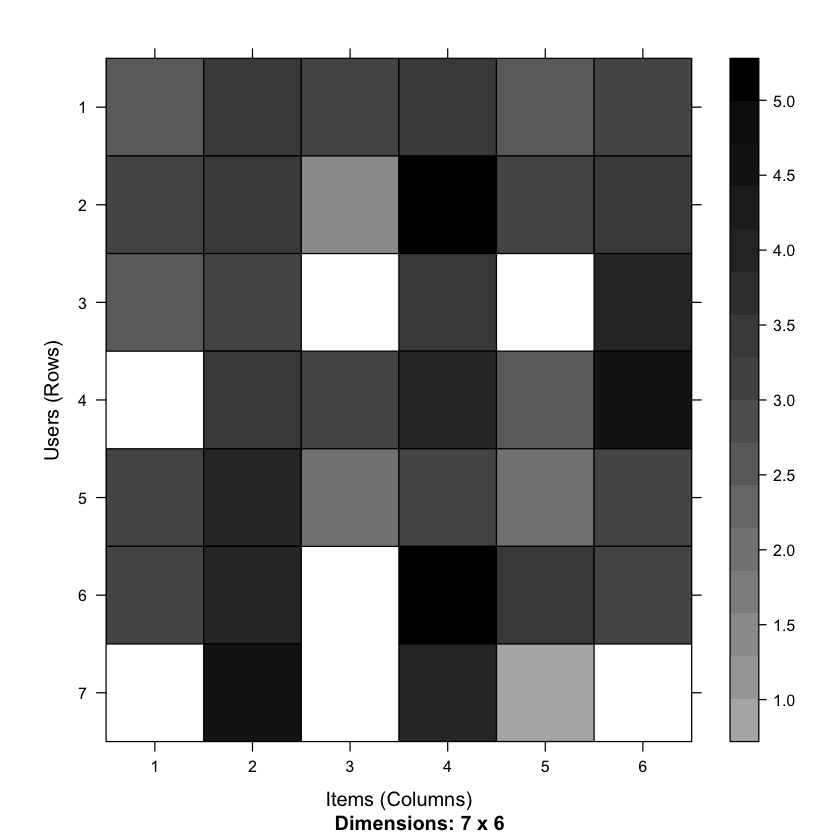

In [133]:
suppressMessages(library(recommenderlab))
movies.m <- as(movies, "realRatingMatrix")
image(movies.m)

## User Based Collaborative Filtering
### Create Model

In [134]:
model.ubcf <- Recommender(movies.m, method = "UBCF")

### Compute Ratings

In [135]:
recom.ubcf.ratings <- predict(model.ubcf, movies.m, type = "ratings")
movies.ubcf.ratings <- as(recom.ubcf.ratings, "matrix")
# For some reason, UBCF prediction matrix doesn't include row names.
dimnames(movies.ubcf.ratings) <- dimnames(movies)
movies.ubcf.ratings

,Titanic,Batman,Inception,Superman,Spiderman,Matrix
Michel,NA,NA,NA,NA,NA,NA
Mathilde,NA,NA,NA,NA,NA,NA
Yann,NA,NA,2.957199,NA,2.980116,NA
Gaëlle,3.315318,NA,NA,NA,NA,NA
Gregory,NA,NA,NA,NA,NA,NA
Jean Christophe,NA,NA,3.323767,NA,NA,NA
Benoit,3.006341,NA,2.770370,NA,NA,3.292755


Missing ratings are computed.

The prediction contains NA for the items rated by the active users.

## Item Based Collaborative Filtering
http://www.dataperspective.info/2015/11/item-based-collaborative-filtering-in-r.html

### Create Model

In [136]:
model.ibcf <- Recommender(movies.m, method = "IBCF")

### Compute Ratings

In [137]:
recom.ibcf.ratings <- predict(model.ibcf, movies.m, type = "ratings")
as(recom.ibcf.ratings, "matrix")

,Titanic,Batman,Inception,Superman,Spiderman,Matrix
Michel,NA,NA,NA,NA,NA,NA
Mathilde,NA,NA,NA,NA,NA,NA
Yann,NA,NA,3.594843,NA,3.380397,NA
Gaëlle,4.707834,NA,NA,NA,NA,NA
Gregory,NA,NA,NA,NA,NA,NA
Jean Christophe,NA,NA,4.618003,NA,NA,NA
Benoit,4.5974941,NA,5.4860525,NA,NA,0.9029084


## Popularity
### Create Model

In [138]:
model.popular <- Recommender(movies.m, method = "POPULAR")

### Compute Ratings

In [139]:
recom.popular.ratings <- predict(model.popular, movies.m, type = "rating")
as(recom.ibcf.ratings, "matrix")

,Titanic,Batman,Inception,Superman,Spiderman,Matrix
Michel,NA,NA,NA,NA,NA,NA
Mathilde,NA,NA,NA,NA,NA,NA
Yann,NA,NA,3.594843,NA,3.380397,NA
Gaëlle,4.707834,NA,NA,NA,NA,NA
Gregory,NA,NA,NA,NA,NA,NA
Jean Christophe,NA,NA,4.618003,NA,NA,NA
Benoit,4.5974941,NA,5.4860525,NA,NA,0.9029084


### Compute Top N

In [140]:
recom.popular.top <- predict(model.popular, movies.m, type = "topN", n = 3)

#### Recommendation for each user

In [141]:
movies.popular.top <- as(recom.popular.top, "list")
names(movies.popular.top) <- row.names(movies)
as.matrix(movies.popular.top[lapply(movies.popular.top, function(x) length(x)) > 0])

Yann,"Inception, Spiderman"
Gaëlle,Titanic
Jean Christophe,Inception
Benoit,"Matrix , Titanic , Inception"


#### Best recommendations for each user

In [142]:
movies.popular.top <- as(bestN(recom.popular.top, n = 1), "list")
names(movies.popular.top) <- row.names(movies)
as.matrix(movies.popular.top[lapply(movies.popular.top, function(x) length(x)) > 0])

Yann,Inception
Gaëlle,Titanic
Jean Christophe,Inception
Benoit,Matrix
